In [5]:
from ligo import em_bright
from ligo.em_bright import em_bright
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error
import time

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
def gaussian_distribution(M_injection, sigma):
    M_recovered = np.random.normal(M_injection, sigma)
    M_recovered = np.array([M_recovered])
    return M_recovered
#this function would take in a random mass generated by var s, that will get put into the gaussian dist function
#with a predefined sigma 0.001
#a new variable mass_injections is run through a loop to iterate for every mass_inj (randomly produced), an array
#of the same length will iterate. so bascially for every mass produced, there is a recovered mass by the
#np.random.normal into M_recovered with the same sigma and that is 1 injection. we want 10,000 of these.

In [18]:
 def mass_predictor(M_inj, M_rec, test_size=0.2, random_state=42, test_result=True):
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=test_size,
                                                         random_state=random_state)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    if not test_result:
        return RandomForestRegressionModel
    y_pred = RandomForestRegressionModel.predict(X_test)
    return (X_test, y_pred, RandomForestRegressor)

In [19]:
M_inj = 10 + (20 - 10)*np.random.random(100000)
M_rec = M_inj + 5
M_inj = M_inj.reshape(-1, 1)
M_rec = M_rec.reshape(-1, 1)
x_test, pred, predictor = mass_predictor(M_inj, M_rec)

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_42483/3711120707.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [20]:
masses = np.array([15, 17, 19])
X = predictor(masses)
print(predictor(masses))

RandomForestRegressor(n_estimators=array([15, 17, 19]))


In [22]:
x_test

array([[19.503482  ],
       [15.57334071],
       [11.47358763],
       ...,
       [13.53362503],
       [16.46330245],
       [10.28707092]])

In [23]:
pred

array([24.50349446, 20.57333483, 16.47364477, ..., 18.53374441,
       21.46330666, 15.28704313])

In [24]:
predictor

sklearn.ensemble._forest.RandomForestRegressor

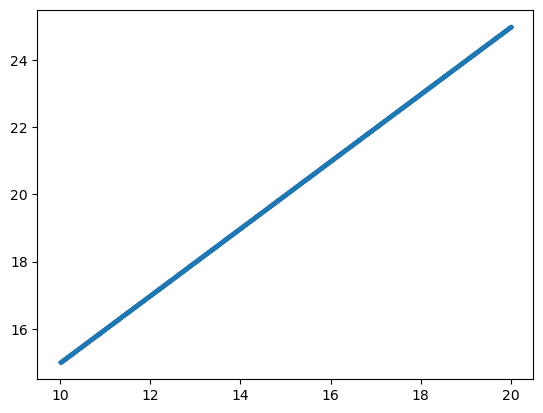

In [25]:
plt.scatter(x_test, pred, s=2)

In [97]:
# def one_mass_prediction(amt_inj, sig):
#     st1 = time.time()
#     M_inj1 = 10 + (20 - 10)*np.random.random(amt_inj)
#     #M_inj1 = 10 + (20 - 10)*np.random.random(100000)
#     #sigma = 0.001
#     sigma = sig
#     M_recovered_values = gaussian_distribution(M_inj1, sigma)
#     M_inj1 = M_inj1.reshape(-1, 1)
#     M_recovered_values = M_recovered_values.reshape(-1, 1)
#     X_train, X_test, y_train, y_test = train_test_split(M_inj1, M_recovered_values, test_size=0.20, random_state=42)
#     RandomForestRegressionModel = RandomForestRegressor()
#     RandomForestRegressionModel.fit(X_train, y_train)
#     y_pred = RandomForestRegressionModel.predict(X_test)
#     print(y_pred)
#     print(X_test)
#     et1 = time.time()
#     dt = et1 - st1
#     print(dt, 'time to train model')
#     df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
#     df2 = df1.corr()
#     plt.scatter(X_test, y_pred, s=2)
#     plt.xlabel('Test Masses')
#     plt.ylabel('Pred Masses')
#     plt.title("Predicting Injected Mass Values")
#     #plt.plot(X_test, y_pred, color='k')
#     plt.show()
#     mean_y_pred1 = np.mean(y_pred)
#     print(mean_y_pred1, 'average true mass prediction')
#     print(np.mean(M_inj1), 'avg mass injected')
#     error = (((np.mean(y_pred) - np.mean(M_inj1)) / np.mean(M_inj1)) * 100) + 100
#     print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
#     et2 = time.time()
#     dt1 = et2 - st1
#     print(dt1,'total time to run')
#     return X_test, y_pred, df2

In [98]:
#one_mass_prediction(10000, 0.001)

In [65]:
def mass_injections(N):
    M_inj = 10 + (20 - 10) * np.random.random(N)
    #this will take an input N from the user and generate an interval with N random points between
    M_inj = M_inj.reshape(-1, 1)
    #rehsaping will prevent model from spitting error
    return M_inj

In [66]:
M_inj = mass_injections(100000)

In [67]:
M_inj

array([[17.01277528],
       [16.61575014],
       [14.01896868],
       ...,
       [11.56468957],
       [11.47765453],
       [12.2260073 ]])

In [68]:
def mass_recovered_gauss_offset(offset, sigma):
    #now we will get a gaussian distribution of the M_rec with an offset to t
    M_rec = np.random.normal(M_inj + offset, sigma)
    #now we have both the mass injections and mass recovered in however the len the N sample is
    M_rec = M_rec.reshape(-1, 1)
    #reshaping is better for the machine learning model
    return M_rec

In [83]:
M_rec = mass_recovered_gauss_offset(5, 1)

In [84]:
M_rec

array([[23.34274342],
       [20.16411417],
       [20.30798556],
       ...,
       [14.58342111],
       [16.45875815],
       [17.71920582]])

In [85]:
def mass_recovered_offset(offset):
    M_rec_1 = M_inj + offset
    M_rec_1 = M_rec_1.reshape(-1, 1)
    return M_rec_1

In [86]:
M_rec_1 = mass_recovered_offset(5)
M_rec_1

array([[22.01277528],
       [21.61575014],
       [19.01896868],
       ...,
       [16.56468957],
       [16.47765453],
       [17.2260073 ]])

In [87]:
def mass_recovered(sigma):
    M_rec_2 = np.random.normal(M_inj, sigma)
    M_rec_2 = M_rec_2.reshape(-1, 1)
    return M_rec_2

In [88]:
M_rec_2 = mass_recovered(1)
M_rec_2

array([[14.89207225],
       [17.61051679],
       [14.13076502],
       ...,
       [12.22774033],
       [11.72784988],
       [14.63181608]])

In [89]:
def mass_predictor(M_inj, M_rec, test_size=0.2, random_state=42, test_result=True):
    X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=test_size,
                                                        random_state=random_state)
    RandomForestRegressionModel = RandomForestRegressor()
    RandomForestRegressionModel.fit(X_train, y_train)
    if not test_result:
        return RandomForestRegressionModel
    y_pred = RandomForestRegressionModel.predict(X_test)
    return (X_test, y_pred, RandomForestRegressor)

In [90]:
x_test, y_pred, predictor = mass_predictor(M_inj, M_rec)

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_42483/3771324174.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [91]:
x_test_1, y_pred_1, predictor = mass_predictor(M_inj, M_rec_1)

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_42483/3771324174.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [92]:
x_test_2, y_pred_2, predictor = mass_predictor(M_inj, M_rec_2)

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_42483/3771324174.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


In [93]:
x_test, y_pred, predictor

(array([[11.74374845],
        [16.50707301],
        [11.82183036],
        ...,
        [16.80292967],
        [13.85720449],
        [18.29875565]]),
 array([16.29020237, 20.48952106, 16.82093701, ..., 21.41446689,
        19.51995858, 22.69819236]),
 sklearn.ensemble._forest.RandomForestRegressor)

In [94]:
x_test_1, y_pred_1, predictor

(array([[11.74374845],
        [16.50707301],
        [11.82183036],
        ...,
        [16.80292967],
        [13.85720449],
        [18.29875565]]),
 array([16.74367604, 21.50704294, 16.82186624, ..., 21.80293652,
        18.85719809, 23.29875536]),
 sklearn.ensemble._forest.RandomForestRegressor)

In [95]:
x_test_2, y_pred_2, predictor

(array([[11.74374845],
        [16.50707301],
        [11.82183036],
        ...,
        [16.80292967],
        [13.85720449],
        [18.29875565]]),
 array([12.55691306, 16.41360417, 11.07233274, ..., 16.94842708,
        14.40819686, 18.0320873 ]),
 sklearn.ensemble._forest.RandomForestRegressor)

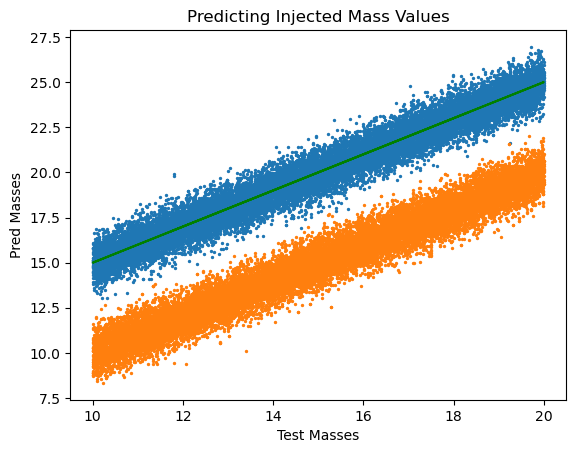

In [102]:
plt.scatter(x_test, y_pred, s=2) #blue is np.normal(m_inj+offset, sigma) i think it is noise
#plt.plot([10, 20], [10, 20], "r--") #red is no offset, linear line
plt.plot(x_test_1, y_pred_1, 'g') #the green is just offset no sigma
plt.scatter(x_test_2, y_pred_2, s=2) #orange is no offset, with sigma
plt.xlabel('Test Masses')
plt.ylabel('Pred Masses')
plt.title("Predicting Injected Mass Values")
#plt.plot(X_test, y_pred, color='k')
plt.show()

In [103]:
df1 = pd.DataFrame(data=np.column_stack((x_test, y_pred)),columns=['X_test','y_pred'])
df2 = df1.corr()
df1, df2

(          X_test     y_pred
 0      11.743748  16.290202
 1      16.507073  20.489521
 2      11.821830  16.820937
 3      19.570596  24.405966
 4      11.034876  16.025310
 ...          ...        ...
 19995  14.995830  20.082894
 19996  15.417513  20.214381
 19997  16.802930  21.414467
 19998  13.857204  19.519959
 19999  18.298756  22.698192
 
 [20000 rows x 2 columns],
           X_test    y_pred
 X_test  1.000000  0.973162
 y_pred  0.973162  1.000000)

In [8]:
def one_mass_prediction_offset(N, offset, sigma, verbose=False, plot=False):
    #we also need to modularize the code, the code is overwhelmed and performing too many actions in one function
    #its similar to trying to multitask, using multiple functions and calling them within each other makes for cleaner
    #and more efficient code
    st1 = time.time()
    #M_inj = 10 + (20 - 10)*np.random.random(N)
    #M_rec = np.random.normal(M_inj + offset, sigma)
    
    #we want to be able to make the function perform the np.random.normal(M_inj+offset, sigma), np.random.normal(M_inj, sigma), and just M_inj + offset
    #the problem is we need the detection to be able to take an input recovered mass that runs through these 
    #predictions to determine the true injected mass, eventually we want the offset to show a correlation
    #that correlation being if we have a two points with a big enough difference their offset should be showing to get worse
    #that gives us clarity that our model is getting better at predicting and acknowleding offsets are making
    #predictions worse and reducing accuracy
    
    #M_inj = M_inj.reshape(-1, 1)
    #M_rec = M_rec.reshape(-1, 1)
    
    #X_train, X_test, y_train, y_test = train_test_split(M_inj, M_rec, test_size=0.20, random_state=42)
    #RandomForestRegressionModel = RandomForestRegressor()
    #RandomForestRegressionModel.fit(X_train, y_train)
    #y_pred = RandomForestRegressionModel.predict(X_test)
    if verbose:
        print(y_pred, 'y_pred')
        print(X_test, 'X_test')
    et1 = time.time()
    dt = et1 - st1
    if verbose:
        print(dt, 'time to train model')
    df1 = pd.DataFrame(data=np.column_stack((X_test, y_pred)),columns=['X_test','y_pred'])
    df2 = df1.corr()
    if plot:
        plt.scatter(X_test, y_pred, s=2)
        plt.plot([10, 20], [10, 20], "r--")
        plt.xlabel('Test Masses')
        plt.ylabel('Pred Masses')
        plt.title("Predicting Injected Mass Values")
        #plt.plot(X_test, y_pred, color='k')
        plt.show()
    if verbose:
        mean_y_pred = np.mean(y_pred)
        print(mean_y_pred, 'average true mass prediction')
        print(np.mean(M_inj), 'avg mass injected')
        error = (((np.mean(y_pred) - np.mean(M_inj)) / np.mean(M_inj)) * 100) + 100
        print(error, '% accuracy between the predicted injected mass and actual random injected mass based on recovered')
        et2 = time.time()
        dt1 = et2 - st1
        print(dt1,'total time to run')
    return df1, df2

In [9]:
one_mass_prediction_offset(100000, 5, 0.1)

/var/folders/hw/r_q5t6hd2r71fj7t3zwm74kc0000gn/T/ipykernel_42483/1332749102.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RandomForestRegressionModel.fit(X_train, y_train)


(          X_test     y_pred
 0      10.653815  15.654198
 1      19.684528  24.684164
 2      16.417194  21.416898
 3      13.460296  18.460342
 4      12.694316  17.694554
 ...          ...        ...
 19995  14.524748  19.524140
 19996  12.749325  17.750721
 19997  19.104918  24.105926
 19998  15.191506  20.191206
 19999  12.069527  17.070444
 
 [20000 rows x 2 columns],
         X_test  y_pred
 X_test     1.0     1.0
 y_pred     1.0     1.0)